# Analysis

* Rural Cities generally have both more riders and drivers
* However, Urban cities, while sparsely used, are generally the most expensive.
* Suburban cities generally fall in between rural cities and urban cities in all of the measured variables



In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
csv= "raw_data/city_data.csv"
csv2='raw_data/ride_data.csv'

In [21]:
a=pd.read_csv(csv)
b=pd.read_csv(csv2)
c=b.groupby('city').sum()
c=c.reset_index()

In [22]:
d=pd.merge(a,c,on='city',how="outer")
del d['ride_id']
d=d.rename(columns={'fare':'Total Fare'})

In [23]:
c=b.groupby('city').count()
c=c.reset_index()
del c['ride_id']
del c['fare']

In [54]:
e=pd.merge(d,c,on='city',how="outer")
e=e.rename(columns={'date':'Total Number of Rides','driver_count':'Total Number of Drivers'})
e['Average Fare']=e['Total Fare']/e['Total Number of Rides']
e.head()

city  Total Number of Drivers   type  Total Fare  \
0      Kelseyland                       63  Urban      610.58   
1      Nguyenbury                        8  Urban      673.39   
2    East Douglas                       12  Urban      575.72   
3   West Dawnfurt                       34  Urban      647.58   
4  Rodriguezburgh                       52  Urban      490.65   

   Total Number of Rides  Average Fare  
0                     28     21.806429  
1                     26     25.899615  
2                     22     26.169091  
3                     29     22.330345  
4                     23     21.332609

In [25]:
labels=pd.unique(e['type'])
groups=e.groupby('type')

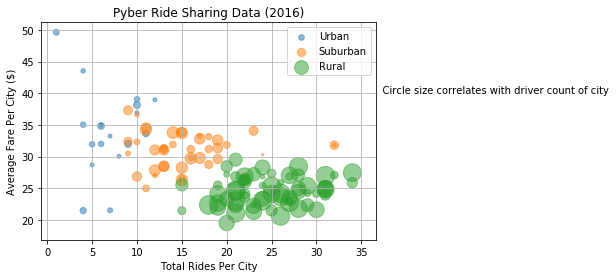

In [48]:
#Bubble Chart
for name, group in groups:
    plt.scatter(group['Total Number of Rides'],group['Average Fare'],s=5*group['Total Number of Drivers'],alpha=0.5)
plt.xlabel('Total Rides Per City')
plt.ylabel('Average Fare Per City ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid(axis='both')
plt.legend(labels)
plt.annotate('    Circle size correlates with driver count of city',xy=(36,40))
plt.show()

In [55]:
f=groups.sum()

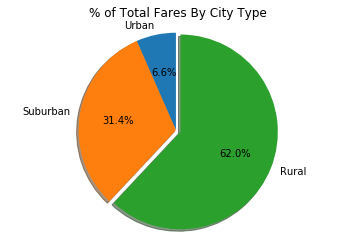

In [28]:
#Pie Chart for % Total Fares By City Types
plt.title("% of Total Fares By City Type")
explode = (0, 0, 0.05)
plt.pie(f['Total Fare'],labels=labels,explode=explode, autopct="%1.1f%%",shadow=True,startangle=90)
plt.axis("equal")
plt.show()

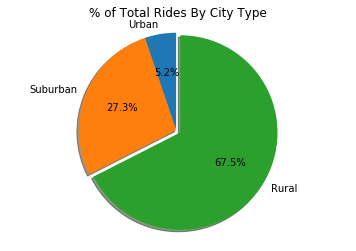

In [29]:
#Pie Chart for Total Rides By City Types
plt.title("% of Total Rides By City Type")
explode = (0, 0, 0.05)
plt.pie(f['Total Number of Rides'],labels=labels,explode=explode, autopct="%1.1f%%",shadow=True,startangle=90)
plt.axis("equal")
plt.show()

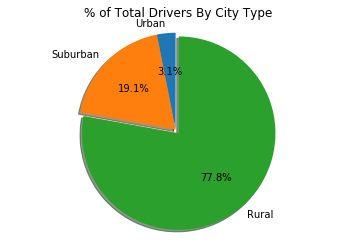

In [18]:
#Pie Chart for Total Drivers By City Types
plt.title("% of Total Drivers By City Type")
explode = (0, 0, 0.05)
plt.pie(f['Total Number of Drivers'],labels=labels,explode=explode, autopct="%1.1f%%",shadow=True,startangle=90)
plt.axis("equal")
plt.show()